In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
# Read in Teams
teams = pd.read_csv("MensBBall\Teams.csv", index_col=0)
teams.head()

,TeamName,FirstD1Season,LastD1Season
TeamID,,,
1101,Abilene Chr,2014,2018
1102,Air Force,1985,2018
1103,Akron,1985,2018
1104,Alabama,1985,2018
1105,Alabama A&M,2000,2018


In [15]:
# Read in Regular Season Results
regularSeasonResults = pd.read_csv("MensBBall\RegularSeasonCompactResults.csv")
regularSeasonResults.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [16]:
# Get rid of DayNum and limit to 2010 or later
regularSeasonResults.drop(labels = ['DayNum'], inplace = True, axis = 1)
regularSeasonResults = regularSeasonResults[regularSeasonResults['Season'] > 2014]
regularSeasonResults.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
134566,2015,1103,74,1420,57,H,0
134567,2015,1104,82,1406,54,H,0
134568,2015,1112,78,1291,55,H,0
134569,2015,1113,86,1152,50,H,0
134570,2015,1119,84,1102,78,H,0


In [17]:
# highest scoring games
highScores = regularSeasonResults[regularSeasonResults['WScore'] > 100]
highScores.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
134587,2015,1166,104,1146,77,H,0
134590,2015,1181,113,1342,44,H,0
134599,2015,1211,104,1170,58,H,0
134605,2015,1231,116,1290,65,H,0
134633,2015,1332,107,1164,65,H,0


In [18]:
# Lowest Scoring Games
lowScores = regularSeasonResults[regularSeasonResults['WScore'] < 50]
lowScores.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
134653,2015,1396,40,1110,37,H,0
134755,2015,1110,49,1384,46,H,0
134756,2015,1113,49,1126,39,H,0
134862,2015,1259,45,1420,38,H,0
135249,2015,1257,45,1156,33,H,0


In [94]:
def getTeamID(teamName):
    teamRecord = teams[teams['TeamName'] == teamName].index.values.astype(int)[0];
    return (teamRecord)

def getTeamName(teamID):
    return teams.loc[teamID].TeamName

marquetteID = getTeamID('Marquette');

In [96]:
def getWinningGames(teamID, gameResults): 
    return gameResults[gameResults['WTeamID'] == teamID]

def getLosingGames(teamID, gameResults):
    return gameResults[gameResults['LTeamID'] == teamID]

def getRecord(teamID, gameResults):
    winners = getWinningGames(teamID, gameResults)
    losers = getLosingGames(teamID, gameResults)
    return winners.append(losers)
    
def addWinColumn(teamID, teamResults):
    teamResults['Win'] = (teamResults['WTeamID'] == teamID)
    return teamResults

def addDifferenceColumn(results):
    results['Difference'] = results.WScore - results.LScore
    return results

In [97]:
print(marquetteID)

1266


In [98]:
muRecordL = getLosingGames(marquetteID, regularSeasonResults)
muRecordW = getWinningGames(marquetteID, regularSeasonResults)
muRecordL.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
134829,2015,1326,74,1266,63,H,0
135020,2015,1303,97,1266,89,A,0
135334,2015,1277,79,1266,68,N,0
135754,2015,1458,49,1266,38,A,0
136544,2015,1177,61,1266,58,H,0


In [99]:
muRecord = getRecord(marquetteID, regularSeasonResults);
muRecord.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
134617,2015,1266,79,1404,63,H,0
135133,2015,1266,62,1312,57,H,0
135295,2015,1266,72,1210,70,N,0
135460,2015,1266,67,1397,59,N,0
136027,2015,1266,78,1113,71,H,0


In [100]:
muRecord = addWinColumn(marquetteID, muRecord)
muRecord.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Win
134617,2015,1266,79,1404,63,H,0,True
135133,2015,1266,62,1312,57,H,0,True
135295,2015,1266,72,1210,70,N,0,True
135460,2015,1266,67,1397,59,N,0,True
136027,2015,1266,78,1113,71,H,0,True


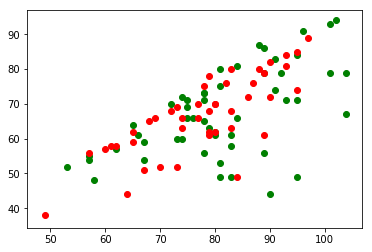

In [101]:
colors = ['g', 'r']
plt.scatter(muRecordW.WScore, muRecordW.LScore, c = 'g')
plt.scatter(muRecordL.WScore, muRecordL.LScore, c = 'r')

C:\Users\sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([ 12.,   3.,  14.,   2.,   3.,   8.,   0.,   1.,   0.,   1.]),
 array([  1. ,   4.4,   7.8,  11.2,  14.6,  18. ,  21.4,  24.8,  28.2,
         31.6,  35. ]),
 <a list of 10 Patch objects>)

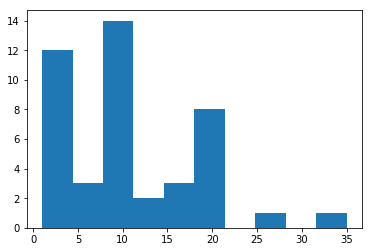

In [102]:
muRecordL = addDifferenceColumn(muRecordL)
plt.hist(muRecordL.Difference)

(array([ 16.,   8.,   9.,   4.,   5.,   3.,   2.,   2.,   1.,   2.]),
 array([  1. ,   5.5,  10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,
         41.5,  46. ]),
 <a list of 10 Patch objects>)

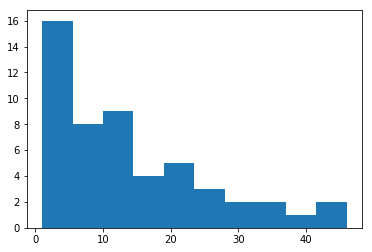

In [103]:
plt.hist(muRecordW['WScore'] - muRecordW['LScore'])

In [104]:
bigWins = muRecordW[(muRecordW.WScore - muRecordW.LScore)> 30]
print(bigWins)

        Season  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
136124    2015     1266      83     1105      49    H      0
140922    2016     1266      95     1212      49    H      0
141054    2016     1266     104     1263      67    H      0
145485    2017     1266      81     1224      49    H      0
146311    2017     1266      90     1441      44    H      0
147117    2017     1266      89     1188      56    H      0


In [105]:
bigLosses = muRecordL[(muRecordL['WScore'] - muRecordL['LScore']) > 30]
print(bigLosses)
print(bigLosses.iloc[0,1])

        Season  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  Difference
139842    2015     1437      84     1266      49    N      0          35
1437


In [106]:
print(getTeamName(bigLosses.iloc[0,1]))

Villanova


In [107]:
OT = muRecord[muRecord['NumOT'] != 0]
print(OT)

        Season  WTeamID  WScore  LTeamID  LScore WLoc  NumOT    Win
140130    2016     1266      75     1237      71    H      1   True
140525    2016     1266      78     1113      73    N      1   True
143853    2016     1266      96     1344      91    H      2   True
147912    2017     1266      89     1371      86    H      1   True
137657    2015     1207      95     1266      85    A      1  False
137954    2015     1139      72     1266      68    A      1  False


In [110]:
creightID = getTeamID('Creighton')

In [113]:
muVCreight = muRecord[(muRecord['LTeamID'] == creightID) | (muRecord['WTeamID'] == creightID)]
print(muVCreight)

        Season  WTeamID  WScore  LTeamID  LScore WLoc  NumOT    Win
137190    2015     1266      53     1166      52    H      0   True
144523    2016     1266      66     1166      61    A      0   True
148406    2017     1266     102     1166      94    A      0   True
150385    2017     1266      91     1166      83    H      0   True
138624    2015     1166      77     1266      70    H      0  False
143980    2016     1166      65     1266      62    A      0  False


In [112]:
plt.scatter(muVCreight.WScore, muVCreight.LScore, c = muVCreight.MUWin)

AttributeError: 'DataFrame' object has no attribute 'MUWin'